# LOAN PREDICTION MODEL

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading data set

In [2]:
df = pd.read_csv('hmeq_Loan_Default.csv')

In [3]:
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [6]:
df.shape

(5960, 13)

#### imputing zeros for less important colum, and median for important ones
#### filling missing values with Missing

In [7]:
df['REASON'] = df['REASON'].fillna('Missing')
df['JOB'] = df['JOB'].fillna('Missing')

In [8]:
col_0 = ['DEROG','DELINQ']
df[col_0] = df[col_0].fillna(0)

In [9]:
# List of columns to impute with median
col_m = ["MORTDUE", "VALUE", "YOJ", "CLAGE", "NINQ", "CLNO", "DEBTINC"]

# Impute each column manually
for col in col_m:
    col_m = df[col].median()
    df[col] = df[col].fillna(col_m)

#### Encoding categorical columns

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
e = LabelEncoder()

In [12]:
category = ['REASON','JOB']
for col in category:
    df[col]=e.fit_transform(df[col])

In [13]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,1,3,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,1,3,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,1,3,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,2,1,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,1,2,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,0,3,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,0,3,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,0,3,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,0,3,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [14]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73001.041812,101540.387423,0.383221,2.709060,8.756166,0.224329,0.405705,179.440725,1.170134,21.247819,34.000651
std,0.399656,11207.480417,42552.726779,56869.436682,0.566551,1.413828,7.259424,0.798458,1.079256,83.574697,1.653866,9.951308,7.644528
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,0.000000,2.000000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,65019.000000,89235.500000,0.000000,3.000000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,88200.250000,119004.750000,1.000000,4.000000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,1.000000,89900.000000,399550.000000,855909.000000,2.000000,6.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [15]:
correlation = df.corr()

<Axes: >

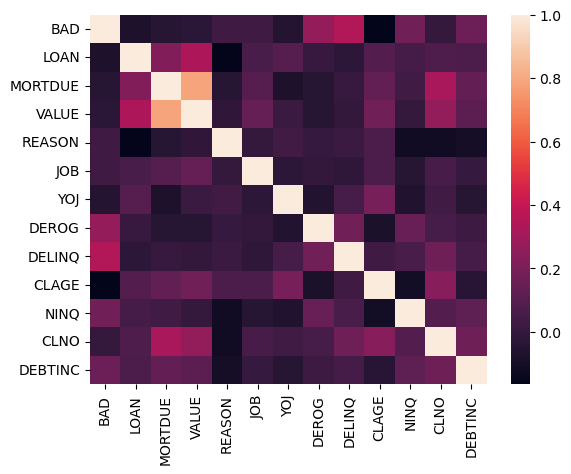

In [16]:
sns.heatmap(correlation)

In [17]:
x = df.drop('BAD', axis =  1)
x

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1100,25860.0,39025.0,1,3,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1300,70053.0,68400.0,1,3,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1500,13500.0,16700.0,1,3,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1500,65019.0,89235.5,2,1,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,1700,97800.0,112000.0,1,2,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262
...,...,...,...,...,...,...,...,...,...,...,...,...
5955,88900,57264.0,90185.0,0,3,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,89000,54576.0,92937.0,0,3,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,89200,54045.0,92924.0,0,3,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,89800,50370.0,91861.0,0,3,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [18]:
# target column
y = df['BAD']
y

0       1
1       1
2       1
3       1
4       0
       ..
5955    0
5956    0
5957    0
5958    0
5959    0
Name: BAD, Length: 5960, dtype: int64

In [19]:
#Spliting the data set
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [22]:
#import the model
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier()

In [25]:
#training the model
model.fit(x_train, y_train);

In [26]:
#checking model score
model.score(x_test, y_test)

0.924496644295302

In [27]:
#predicting the model
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [28]:
#evaluating model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [29]:
a_score = accuracy_score(y_test,y_pred)
a_score

0.924496644295302

In [30]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       947
           1       0.90      0.71      0.79       245

    accuracy                           0.92      1192
   macro avg       0.92      0.85      0.87      1192
weighted avg       0.92      0.92      0.92      1192



In [31]:
confused = confusion_matrix(y_test,y_pred)
confused

array([[928,  19],
       [ 71, 174]])

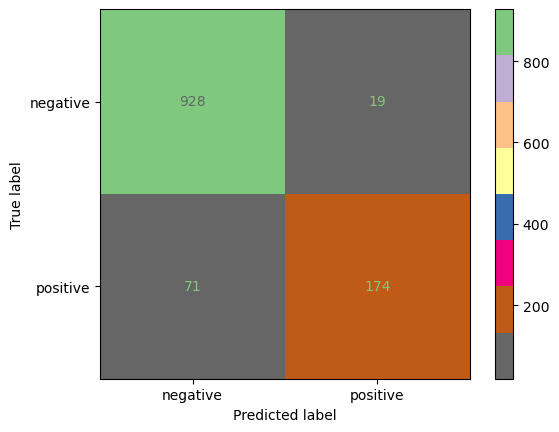

In [32]:
classname = ['negative','positive']
confusion_matrix = confused
cmd = ConfusionMatrixDisplay(confusion_matrix = confused,display_labels = classname)
cmd.plot(cmap = 'Accent_r')
plt.show()

In [33]:
import joblib

In [34]:
model = joblib.dump(model,'Model.pkl')
encoder = joblib.dump(e,'Encoder.pkl')

In [41]:
import tkinter as tk
from tkinter import messagebox

# Load the trained model
MODEL_PATH = r"C:\Users\zeena\Desktop\advanced ai\Model.pkl"
ENC_PATH = r"C:\Users\zeena\Desktop\advanced ai\encoder.pkl"

model = joblib.load(MODEL_PATH)
encoder = joblib.load(ENC_PATH)

# GUI Setup
root = tk.Tk()
root.title(" Loan Risk Analyzer")
root.geometry("600x600")
root.configure(bg="#0f0f0f")  # Futuristic black background

tk.Label(root, text="Loan Default Risk Prediction", font=("Helvetica", 20, "bold"),
         bg="#0f0f0f", fg="#00ffff").pack(pady=20)

# 🧾 Input fields
fields = {
    'LOAN': None, 'MORTDUE': None, 'VALUE': None, 'REASON': None, 'JOB': None,
    'YOJ': None, 'DEROG': None, 'DELINQ': None, 'CLAGE': None, 'NINQ': None,
    'CLNO': None, 'DEBTINC': None,
}

entries = {}
for field in fields:
    frame = tk.Frame(root, bg="#0f0f0f")
    frame.pack(pady=5)
    tk.Label(frame, text=field, font=("Helvetica", 12), bg="#0f0f0f", fg="#ffffff").pack(side=tk.LEFT)
    entry = tk.Entry(frame, font=("Helvetica", 12), width=30, bg="#1a1a1a", fg="#00ffff", insertbackground="#00ffff")
    entry.pack(side=tk.RIGHT)
    entries[field] = entry

# Prediction function
def predict():
    try:
        input_data = {field: entries[field].get() for field in fields}
        df_input = pd.DataFrame([input_data])
        # Convert numeric fields to numbers
        for col in ['LOAN','MORTDUE','VALUE','REASON','JOB','YOJ','DEROG',
                    'DELINQ','CLAGE','NINQ','CLNO','DEBTINC']:
            df_input[col] = pd.to_numeric(df_input[col], errors='coerce')
        prediction = model.predict(df_input)[0]
        result = "⚠️ High Risk of Default" if prediction == 1 else "✅ Low Risk of Default"
        messagebox.showinfo("Prediction Result", result)
    except Exception as e:
        messagebox.showerror("Error", f"Prediction failed:\n{e}")

# 🧭 Buttons
btn_frame = tk.Frame(root, bg="#0f0f0f")
btn_frame.pack(pady=20)

tk.Button(btn_frame, text="Predict", command=predict,
          font=("Helvetica", 14, "bold"), bg="#00ffff", fg="#0f0f0f",
          padx=20, pady=5).grid(row=0, column=0, padx=10)

tk.Button(btn_frame, text="Exit", command=root.destroy,
          font=("Helvetica", 14, "bold"), bg="#333333", fg="#ffffff",
          padx=20, pady=5).grid(row=0, column=1, padx=10)

root.mainloop()

KeyboardInterrupt: 

In [ ]:
!pip install streamlit

In [ ]:
pip install streamlit
import streamlit as st
import pandas as pd
import joblib

# Load model
model = joblib.load('loan_default_model.pkl')

# Set page config
st.set_page_config(page_title="Loan Risk Analyzer", layout="centered", page_icon="💼")

# Title
st.markdown("<h1 style='text-align: center; color: #00ffff;'>💼 Loan Default Risk Analyzer</h1>", unsafe_allow_html=True)
st.markdown("---")

# Input fields
st.markdown("### Enter Loan Details")

loan = st.number_input("Loan Amount", min_value=0)
mortdue = st.number_input("Mortgage Due", min_value=0.0)
value = st.number_input("Property Value", min_value=0.0)
yoj = st.number_input("Years on Job", min_value=0)
derog = st.number_input("Number of Derogatory Reports", min_value=0)
delinq = st.number_input("Number of Delinquencies", min_value=0.0)
clage = st.number_input("Age of Oldest Credit Line", min_value=0.0)
ninq = st.number_input("Recent Credit Inquiries", min_value=0.0)
clno = st.number_input("Number of Credit Lines", min_value=0)
debtinc = st.number_input("Debt-to-Income Ratio", min_value=0.0)

reason = st.selectbox("Loan Reason", ["HomeImp", "DebtCon", "Missing"])
job = st.selectbox("Job Type", ["Other", "Office", "Sales", "Mgr", "ProfExe", "Self", "Missing"])

# Predict button
if st.button("🔍 Predict Loan Risk"):
    input_data = pd.DataFrame([{
        'LOAN': loan, 'MORTDUE': mortdue, 'VALUE': value, 'YOJ': yoj,
        'DEROG': derog, 'DELINQ': delinq, 'CLAGE': clage, 'NINQ': ninq,
        'CLNO': clno, 'DEBTINC': debtinc, 'REASON': reason, 'JOB': job
    }])

    prediction = model.predict(input_data)[0]
    result = "⚠️ High Risk of Default" if prediction == 1 else "✅ Low Risk of Default"

    st.markdown(f"<h2 style='text-align: center; color: {'red' if prediction == 1 else 'lime'};'>{result}</h2>", unsafe_allow_html=True)


### 🚀 Step 3: Run the App
```bash
streamlit run loan_app.py